Task 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
object_points = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]  # Closing the square
])

In [ ]:
# Plotting function
def plot_object(points, title):
    plt.figure()
    plt.plot(points[:, 0], points[:, 1], 'bo-')  # Blue lines with dots
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.axis('equal')
    plt.show()

# Transformation functions
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))  # Homogeneous
    return np.dot(points_h, translation_matrix.T)[:, :2]

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return np.dot(points_h, scaling_matrix.T)[:, :2]

def rotate(points, angle_deg):
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                                 [np.sin(angle_rad), np.cos(angle_rad), 0],
                                 [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return np.dot(points_h, rotation_matrix.T)[:, :2]

def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return np.dot(points_h, reflection_matrix.T)[:, :2]

def shear(points, shx, shy):
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    return np.dot(points_h, shearing_matrix.T)[:, :2]

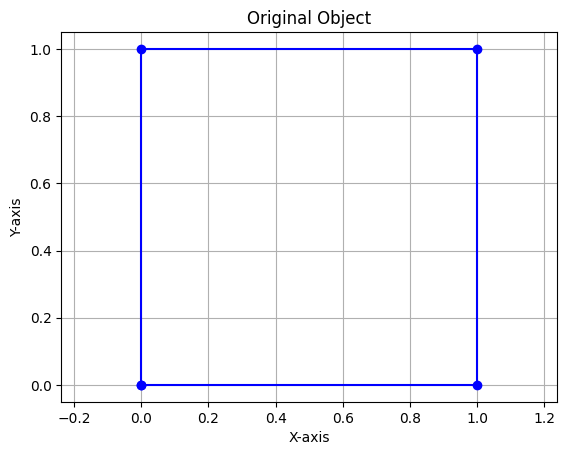

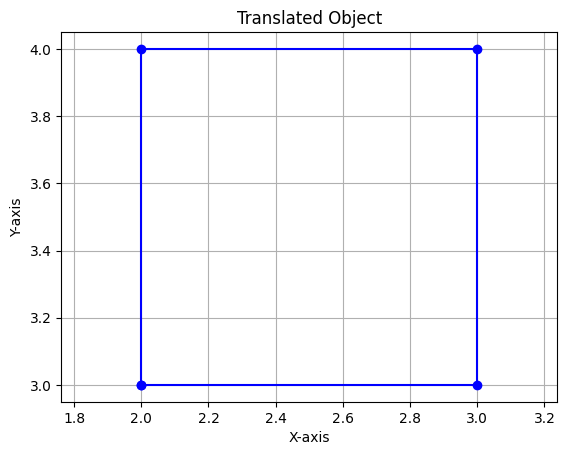

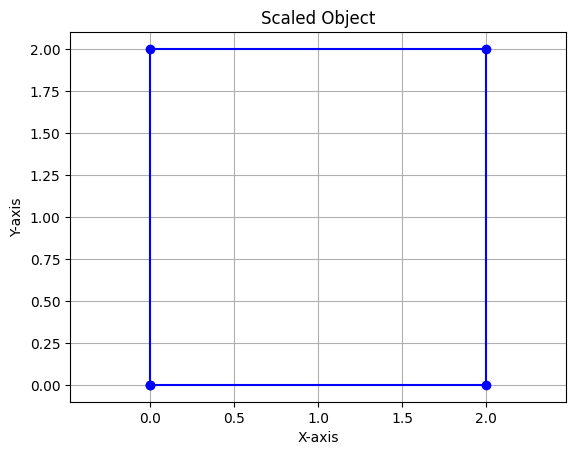

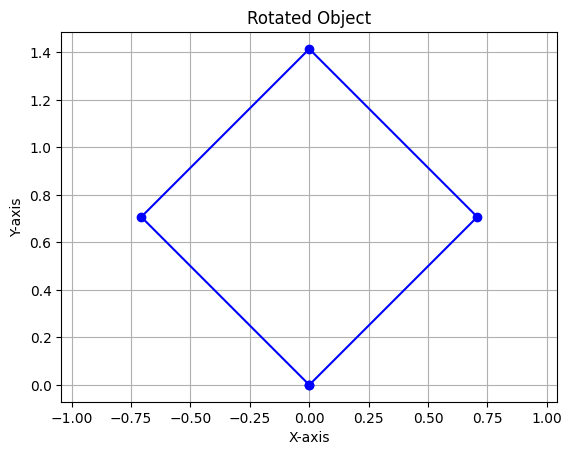

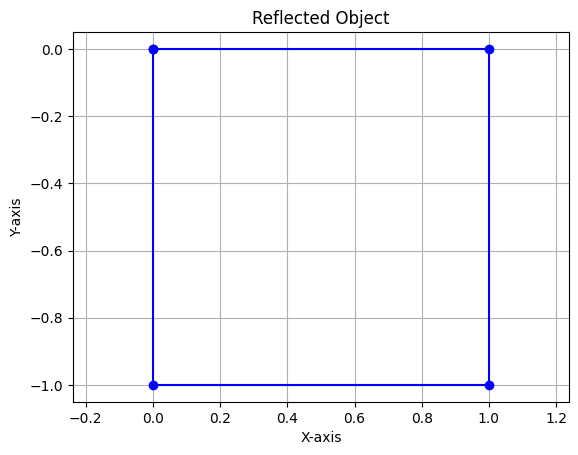

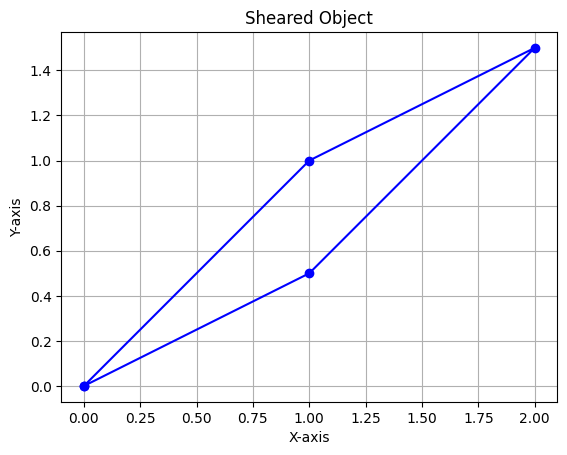

In [ ]:
# Example: Apply transformations
translated = translate(object_points, 2, 3)
scaled = scale(object_points, 2, 2)
rotated = rotate(object_points, 45)
reflected = reflect(object_points, 'x')
sheared = shear(object_points, 1, 0.5)

# Plot results
plot_object(object_points, "Original Object")
plot_object(translated, "Translated Object")
plot_object(scaled, "Scaled Object")
plot_object(rotated, "Rotated Object")
plot_object(reflected, "Reflected Object")
plot_object(sheared, "Sheared Object")

Task 2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

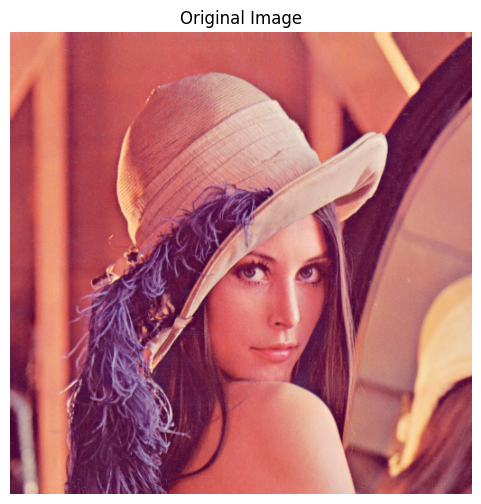

In [ ]:
# Load the image
image_path = '/content/Lena_Image.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib display

# Helper function to display images
def show_image(title, img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Original Image
show_image("Original Image", img)

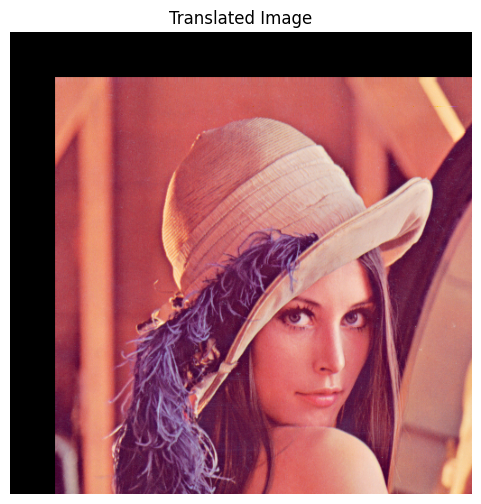

In [ ]:
# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated

translated_img = translate_image(img, tx=50, ty=50)
show_image("Translated Image", translated_img)

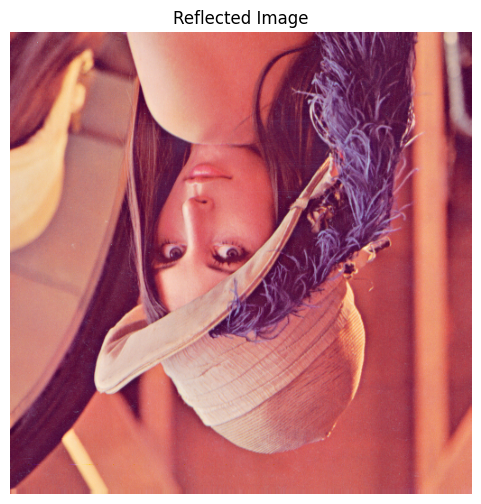

In [ ]:
# 2. Reflection (Flip)
def reflect_image(image, flip_code):
    reflected = cv2.flip(image, flip_code)  # flip_code: 0 for vertical, 1 for horizontal, -1 for both
    return reflected

reflected_img = reflect_image(img, flip_code=-1)  # Flip vertically and horizontally
show_image("Reflected Image", reflected_img)

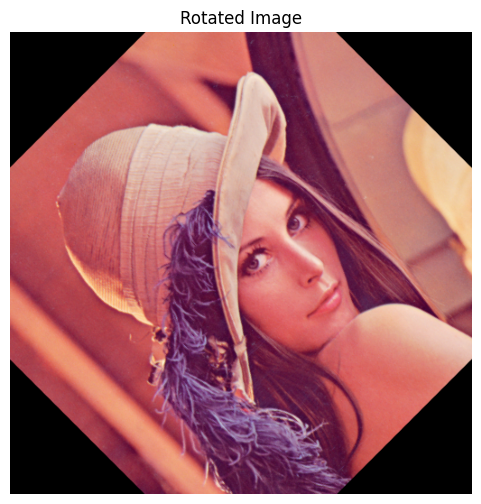

In [ ]:
# 3. Rotation
def rotate_image(image, angle, scale=1.0):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, scale)
    rotated = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated

rotated_img = rotate_image(img, angle=45)
show_image("Rotated Image", rotated_img)

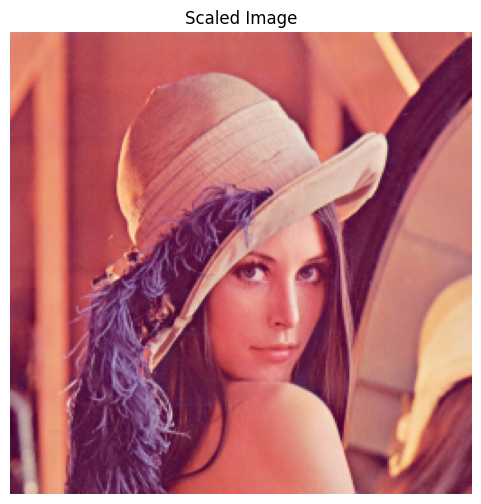

In [ ]:
# 4. Scaling
def scale_image(image, fx, fy):
    scaled = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled

scaled_img = scale_image(img, fx=0.5, fy=0.5)  # Scaling down by 50%
show_image("Scaled Image", scaled_img)

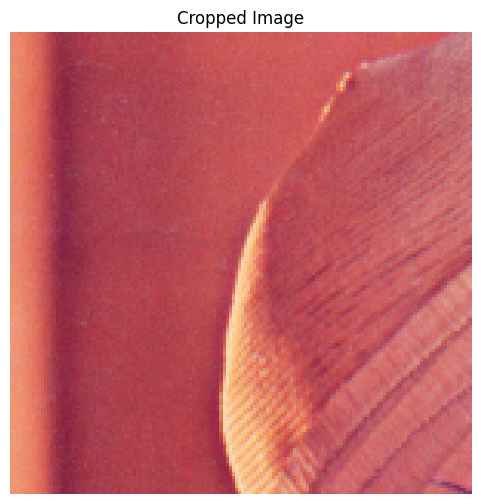

In [ ]:
# 5. Cropping
def crop_image(image, x_start, y_start, x_end, y_end):
    cropped = image[y_start:y_end, x_start:x_end]
    return cropped

cropped_img = crop_image(img, x_start=50, y_start=50, x_end=200, y_end=200)
show_image("Cropped Image", cropped_img)

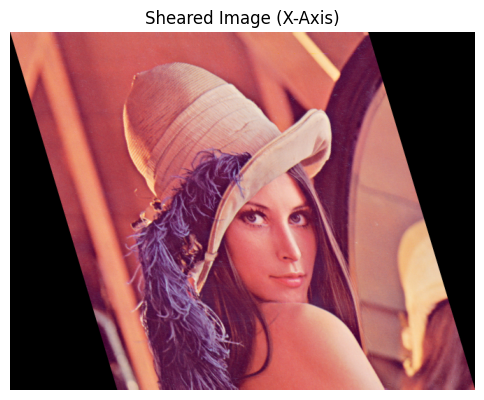

In [ ]:
# 6. Shearing in x-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(image, shear_matrix, (cols + int(rows * shear_factor), rows))
    return sheared

sheared_x_img = shear_image_x(img, shear_factor=0.3)
show_image("Sheared Image (X-Axis)", sheared_x_img)

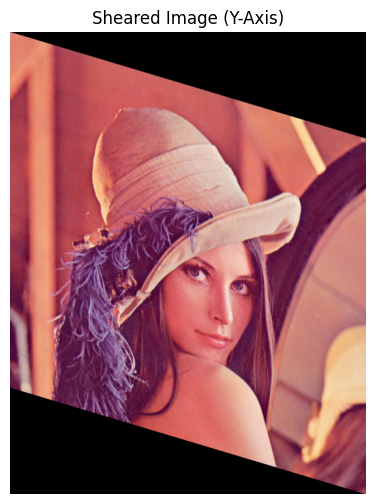

In [ ]:
# 7. Shearing in y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared = cv2.warpAffine(image, shear_matrix, (cols, rows + int(cols * shear_factor)))
    return sheared

sheared_y_img = shear_image_y(img, shear_factor=0.3)
show_image("Sheared Image (Y-Axis)", sheared_y_img)